In [1]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [4]:
train_datagener = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
    )

train_ds = train_datagener.flow_from_directory(
    directory = "wheat_disease/data/train",
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
)

val_ds = test_datagen.flow_from_directory(
    directory = "wheat_disease/data/valid",
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)
"""
train_ds = keras.utils.image_dataset_from_directory(
    directory = "splited_potato_dataset/train",
    labels = "inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = "splited_potato_dataset/val",
    labels = "inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (256,256)
)
"""

Found 13104 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


'\ntrain_ds = keras.utils.image_dataset_from_directory(\n    directory = "splited_potato_dataset/train",\n    labels = "inferred",\n    label_mode = "categorical",\n    batch_size = 32,\n    image_size = (256,256)\n)\n\nval_ds = keras.utils.image_dataset_from_directory(\n    directory = "splited_potato_dataset/val",\n    labels = "inferred",\n    label_mode = "categorical",\n    batch_size = 32,\n    image_size = (256,256)\n)\n'

In [5]:
#create a model
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu' ,input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2, 2)))
#keep at this rate if the model does not improve above the range of 0.68 for the vlaidation accuracy
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
"""
model.add(layers.Conv2D(256, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
"""
model.summary()
#flatten the output
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(15,activation='softmax'))#15 classes to be predicted
model.summary()

c:\Users\sache\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,911 (56.61 MB)

 Trainable params: 14,840,911 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#compile the model
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy,
              metrics = ['accuracy'])

history = model.fit(train_ds, epochs=37, validation_data=val_ds)

c:\Users\sache\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2435 - loss: 2.4734

c:\Users\sache\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


410/410 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.2438 - loss: 2.4725 - val_accuracy: 0.2833 - val_loss: 2.4832
Epoch 2/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 676s 2s/step - accuracy: 0.4908 - loss: 1.6310 - val_accuracy: 0.4033 - val_loss: 2.1278
Epoch 3/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 0.5471 - loss: 1.3974 - val_accuracy: 0.4200 - val_loss: 1.9200
Epoch 4/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 673s 2s/step - accuracy: 0.5953 - loss: 1.2490 - val_accuracy: 0.4933 - val_loss: 2.0047
Epoch 5/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accuracy: 0.6393 - loss: 1.1186 - val_accuracy: 0.4933 - val_loss: 2.1067
Epoch 6/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 614s 1s/step - accuracy: 0.6673 - loss: 1.0147 - val_accuracy: 0.5600 - val_loss: 1.8939
Epoch 7/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 627s 2s/step - accuracy: 0.7037 - loss: 0.8993 - val_accuracy: 0.6000 - val_loss: 1.6562
Epoch 8/37
410/410 ━━━━━━━━━━━━━━━━━━━━ 626s 2s/step - accuracy: 0.7334 - loss: 0.8189 - val_accuracy: 0.596

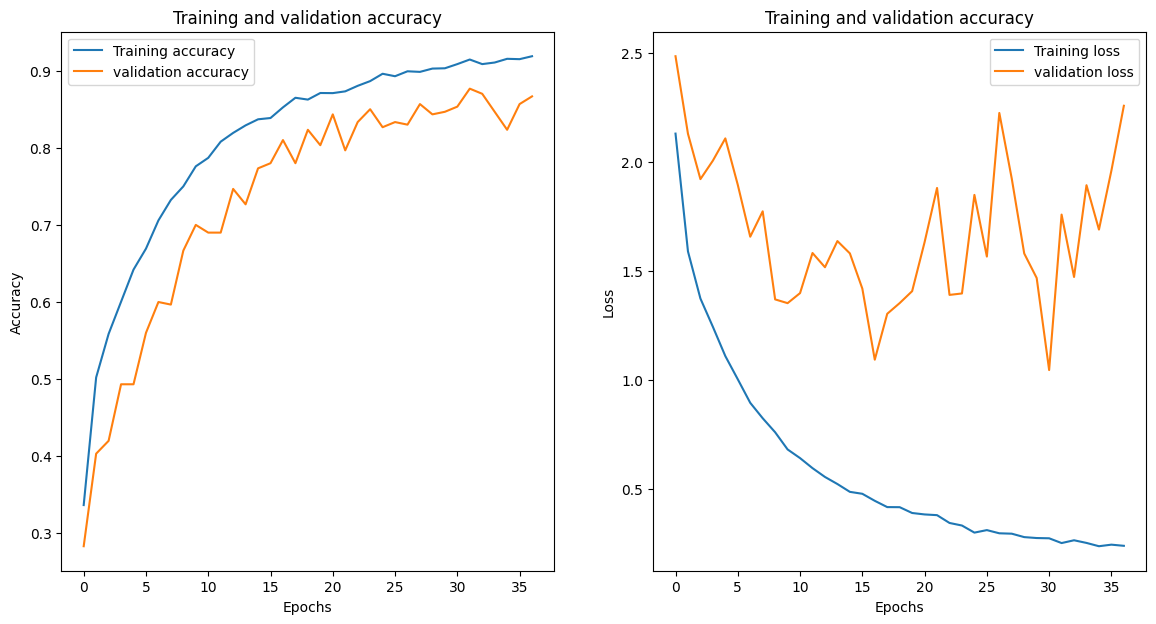

In [7]:
fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'validation loss'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()